# Pristine GRAPE calculation of control fields for cnot implementation

Robert Johansson (robert@riken.jp)

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np

In [35]:
from qutip import *
from qutip.control import *

In [36]:
T = 2 * np.pi 
times = np.linspace(0, T, 500)

"""
    Class for representing the result of a GRAPE simulation.

    Attributes
    ----------
    u : array
        GRAPE control pulse matrix.

    H_t : time-dependent Hamiltonian
        The time-dependent Hamiltonian that realize the GRAPE pulse sequence.

    U_f : Qobj
        The final unitary transformation that is realized by the evolution
        of the system with the GRAPE generated pulse sequences.
    
    """

In [37]:
U = cnot()
R = 500
H_ops = [tensor(sigmax(), identity(2)),
         tensor(sigmay(), identity(2)),
         tensor(sigmaz(), identity(2)),
         tensor(identity(2), sigmax()),
         tensor(identity(2), sigmay()),
         tensor(identity(2), sigmaz()),
         tensor(sigmax(), sigmax()) +
         tensor(sigmay(), sigmay()) +
         tensor(sigmaz(), sigmaz())]

H_labels = [r'$u_{1x}$', r'$u_{1y}$', r'$u_{1z}$',
            r'$u_{2x}$', r'$u_{1y}$', r'$u_{2z}$',
            r'$u_{xx}$',
            r'$u_{yy}$',
            r'$u_{zz}$',
        ]

$U = CNOT $   
$H_{ops} = [\sigma_{x} \otimes Q, \sigma_{y} \otimes Q,  \sigma_{z} \otimes Q, Q \otimes \sigma_{x}, Q \otimes \sigma_{y}, Q \otimes \sigma_{z}, \sigma_{x} \otimes \sigma_{x}, \sigma_{y} \otimes \sigma_{y}, \sigma_{z} \otimes \sigma_{z}, ] $


In [38]:
H_ops

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0. 0. 1. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.+0.j 0.-1.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+1.j 0.+0.j 0.+0.j]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.  0.  0.]
  [ 0.  1.  0.  0.]
  [ 0.  0. -1.  0.]
  [ 0.  0.  0. -1.]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.-1.j 0.+0.j 0.+0.j]
  [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
  [0.+0.j 0.+0.j 0.+1.j 0.+0.j]],
 Quantum object: dims = [[2, 2], [2,

In [8]:
H0 = 1 * np.pi * (tensor(sigmax(), identity(2)) + tensor(identity(2), sigmax()))

c_ops = []

# This is the analytical result in the absense of single-qubit tunnelling
#g = pi/(4 * T)
#H = g * (tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()))

In [39]:
H0

NameError: name 'H0' is not defined

# GRAPE

In [24]:
from qutip.control.grape import plot_grape_control_fields, _overlap, grape_unitary_adaptive, cy_grape_unitary

In [25]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

In [26]:
u0 = np.array([np.random.rand(len(times)) * 2 * np.pi * 0.05 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

u_limits = None #[0, 1 * 2 * pi]
alpha = None

In [27]:
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, u_limits=u_limits,
                          eps=2*np.pi*1, alpha=alpha, phase_sensitive=False,
                          progress_bar=TextProgressBar())

NameError: name 'H0' is not defined

## Plot control fields for cnot gate in the presense of single-qubit tunnelling

plot_grape_control_fields(times, u, labels, uniform_axes=False):
    """
    Plot a series of plots showing the GRAPE control fields given in the
    given control pulse matrix u.

    Parameters
    ----------
    times : array
        Time coordinate array.

    u : array
        Control pulse matrix.

    labels : list
        List of labels for each control pulse sequence in the control pulse
        matrix.

    uniform_axes : bool
        Whether or not to plot all pulse sequences using the same y-axis scale.
    
    """

In [28]:
plot_grape_control_fields(times,
                          result.u / (2 * np.pi), H_labels, uniform_axes=True);

NameError: name 'result' is not defined

## Fidelity/overlap

In [29]:
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [30]:
result.U_f

NameError: name 'result' is not defined

In [ ]:
result.U_f/result.U_f[0,0]

In [ ]:
_overlap(U, result.U_f).real, abs(_overlap(U, result.U_f)) ** 2

## Test numerical integration of GRAPE pulse

In [ ]:
U_f_numerical = propagator(
    result.H_t, times[-1], [], options=Odeoptions(nsteps=5000), args={})
U_f_numerical

In [ ]:
U_f_numerical / U_f_numerical[0,0]

In [ ]:
_overlap(result.U_f, U_f_numerical).real, abs(_overlap(result.U_f, U_f_numerical))**2

# Process tomography

## Ideal cnot gate

In [31]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

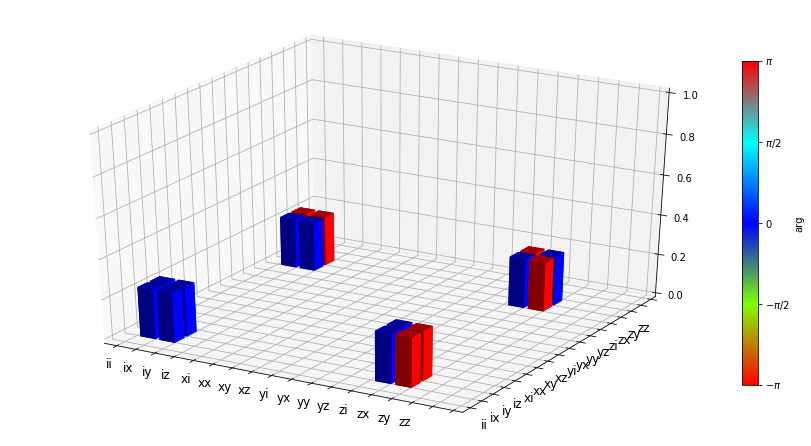

In [32]:
fig = plt.figure(figsize=(12,6))

U_i_s = to_super(U)

chi = qpt(U_i_s, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## cnot gate calculated using GRAPE

In [33]:
fig = plt.figure(figsize=(12,6))

U_f_s = to_super(result.U_f)

chi = qpt(U_f_s, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

NameError: name 'result' is not defined

<Figure size 864x432 with 0 Axes>

## Versions

In [ ]:
from qutip.ipynbtools import version_table

version_table()